# Regression: Car price Prediction
***

[I. Prerequisite](#prerequisite)

[II. Import Libraries and set required parameters](#library)

[III. Data Sourcing](#sourcing)

[IV. Data Preprocessing](#preprocessing)

[V. Exploratory Data Analysis](#eda)

[VI. Convert Categorical Variables to Continuos](#cat)

[VII. Feature Scaling](#scaling)

[VII. Feature Selection](#feature)

[VIII. Bivariate/Multivariate Analysis](#bivariate)

[IX. Bivariate/Multivariate Analysis with Probability of Charged off](#bivariate_prob)

[X. Conclusion](#Conclusion)

<a id='prerequisite'></a>

## I. Prerequisite

1. Place 'CarPrice_Assignment.csv' input file at your current working directory before running this code.

2. Please make sure that you have following python libraries imported/installed at your system:

    * numpy version	: 1.12.1 or higher
    * pandas version	: 0.20.3 or higher
    * seaborn version	: 0.8.0 or higher

<a id='library'></a>

## II. Import Libraries and set required parameters

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.3f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

<a id='sourcing'></a>

## III. Data Sourcing

In [2]:
car = pd.read_csv('CarPrice_Assignment.csv')
print('Rows & Columns ::',car.shape)
car.head()

Rows & Columns :: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


<a id='preprocessing'></a>

## IV. Data Preprocessing

In [3]:
# check if there are any null values
car.isnull().sum().sum()

0

In [4]:
# check if there are any negative values(in numeric columns)
numeric_columns = car.select_dtypes(include=['number'])
numeric_columns.columns[(numeric_columns < 0).any()]

Index(['symboling'], dtype='object')

In [5]:
# As per the problem statement variable name 'CarName'  comprised of two parts:
# first word is the name of 'car company' and the second is the 'car model'.
car['company'],car['model'] = car['CarName'].str.split(' ', 1).str

In [6]:
car[['CarName','company']].sample(4)

,CarName,company
122,plymouth fury gran sedan,plymouth
45,isuzu D-Max V-Cross,isuzu
67,buick electra 225 custom,buick
200,volvo 145e (sw),volvo


In [7]:
# drop CarName column now
car.drop(labels=['CarName','model'],axis=1, inplace=True)

### data quality issues

In [8]:
# data cleaning in company column
car.company.unique()
# mazda is mis-spelled as maxda
# toyota is mis-spelled as toyouta
# porsche is mis-spelled as porcshce
# volkswagen is mis-spelled as vokswagen
# volkswagen in short form written as vw
# Nissan & nissan considered as two differnt company

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
car['company'] = car['company'].str.lower()
car['company'] = car.loc[:, 'company'].replace(['maxda', 'toyouta', 'porcshce','vokswagen','vw'], \
                              ['mazda', 'toyota', 'porsche','volkswagen','volkswagen'])

In [10]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<a id='eda'></a>

## V. Exploratory Data Analysis

### Univariate Analysis

##### Car price Distribution

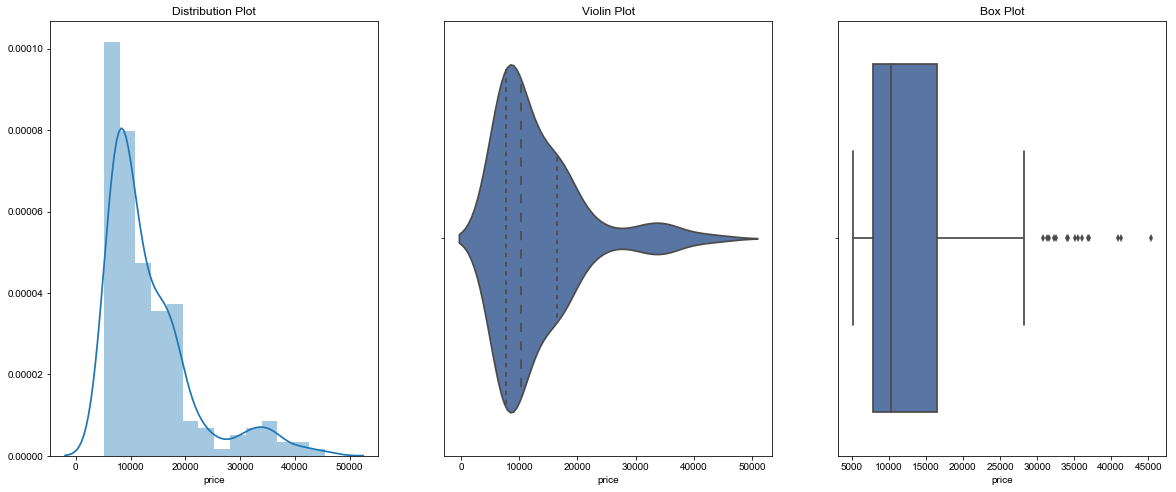

In [11]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
sns.set(style="darkgrid")
ax[0].set_title("Distribution Plot")
sns.distplot(car['price'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(car['price'],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(car['price'],ax=ax[2])
plt.show()

<font color='blue'><b>Insights</b>: Most of the car prices are distributed between 5000 to 15000 USD.</font> 

##### Pie Chart of different categorical variables.

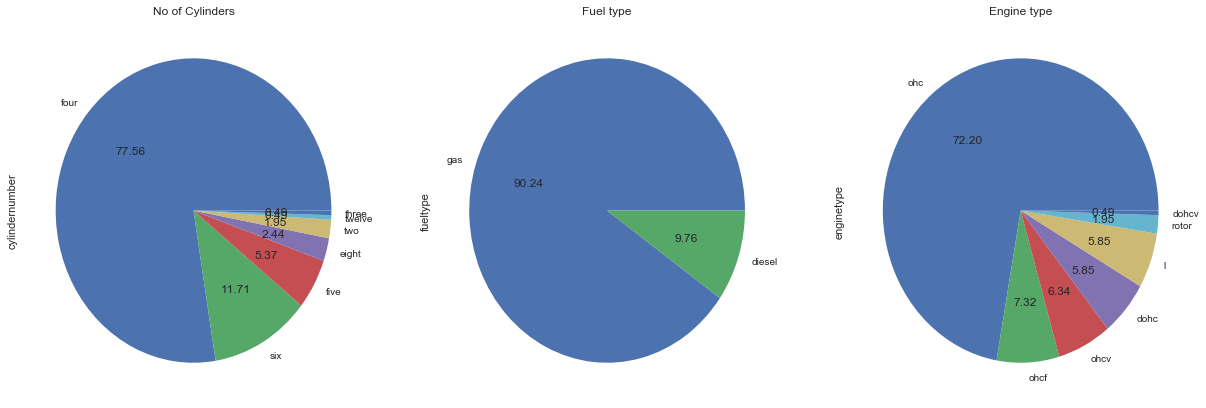

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(21,7))
car['cylindernumber'].value_counts().plot.pie(autopct='%.2f',ax=ax[0])
ax[0].set_title("No of Cylinders")
car['fueltype'].value_counts().plot.pie(autopct='%.2f',ax=ax[1])
ax[1].set_title("Fuel type")
car['enginetype'].value_counts().plot.pie(autopct='%.2f',ax=ax[2])
ax[2].set_title("Engine type")
plt.show()

<font color='blue'><b>Insights::</b></font> 
1. __77%__ of the cars have __four__ cylinders.
2. __90%__ of the cars have __gas__ as a fuel type.
3. __72%__ of the cars have __ohc__ engine type.

##### Heatmap :: Correlation between continuos variables.

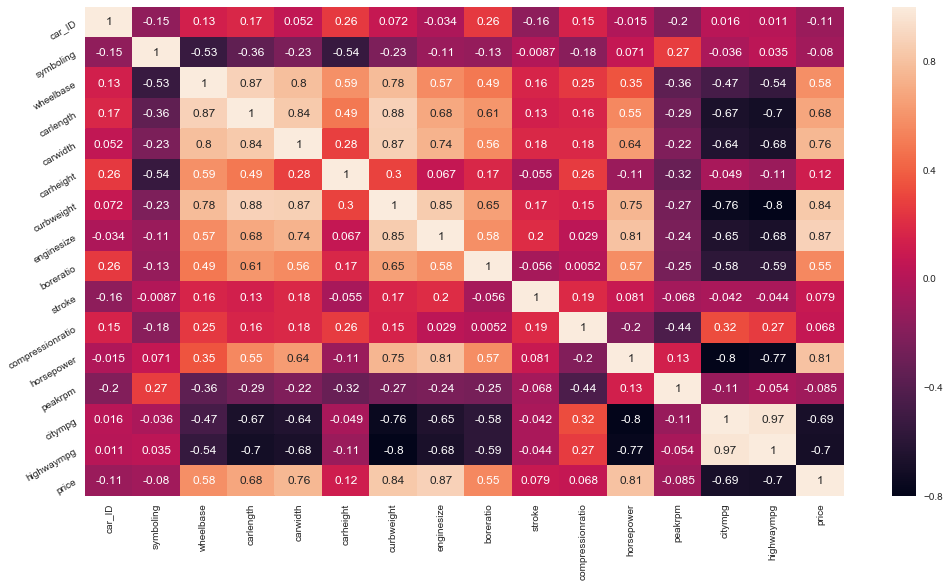

In [13]:
corr = car.corr()
plt.figure(figsize=(17,9))
ax = sns.heatmap(corr, annot=True)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

#### Insights:
1. Price is more correlated with engine size and curb weight of the car
2. Curb weight is mostly correlated with car length & car width.
3. Wheel base is highly correlated with car length & car width.

In [14]:
#car.select_dtypes(exclude=['number']).head()
# Alternatively we can use the below statement as well to get the categorical columns
#car.select_dtypes(include=['object']).head()

In [15]:
#derived metrics


In [16]:
car.sample(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
48,49,0,gas,std,four,sedan,rwd,front,113.00,199.60,69.60,52.80,4066,dohc,six,258,mpfi,3.63,4.17,8.10,176,4750,15,19,35550.00,jaguar
64,65,0,gas,std,four,hatchback,fwd,front,98.80,177.80,66.50,55.50,2425,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,11245.00,mazda
38,39,0,gas,std,two,hatchback,fwd,front,96.50,167.50,65.20,53.30,2289,ohc,four,110,1bbl,3.15,3.58,9.00,86,5800,27,33,9095.00,honda
124,125,3,gas,turbo,two,hatchback,rwd,front,95.90,173.20,66.30,50.20,2818,ohc,four,156,spdi,3.59,3.86,7.00,145,5000,19,24,12764.00,plymouth
198,199,-2,gas,turbo,four,sedan,rwd,front,104.30,188.80,67.20,56.20,3045,ohc,four,130,mpfi,3.62,3.15,7.50,162,5100,17,22,18420.00,volvo


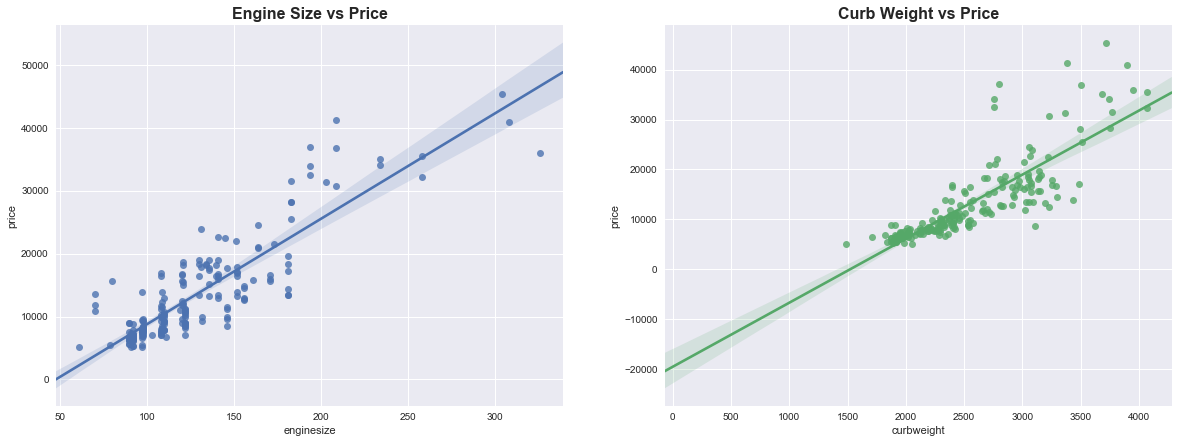

In [17]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,7))
ax[0].set_title('Engine Size vs Price',fontsize=16,weight="bold")
sns.regplot(x='enginesize',y='price', data =car,ax=ax[0])
ax[1].set_title("Curb Weight vs Price",fontsize=16,weight="bold")
sns.regplot(x='curbweight',y='price', data =car,ax=ax[1])
plt.show()

### Bivariate/Multivariate Analysis

In [18]:
car.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

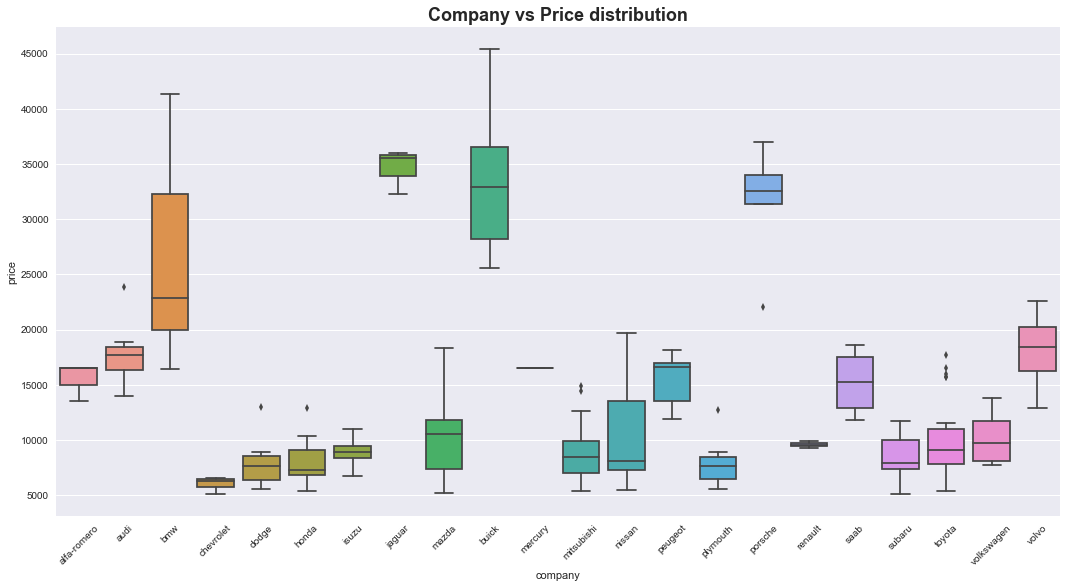

In [19]:
# Price distribution of the cars company-wise
plt.figure(figsize=(18,9))
ax = sns.boxplot(x='company',y='price',data=car)
ax.set_title('Company vs Price distribution',fontsize=18,weight="bold")
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

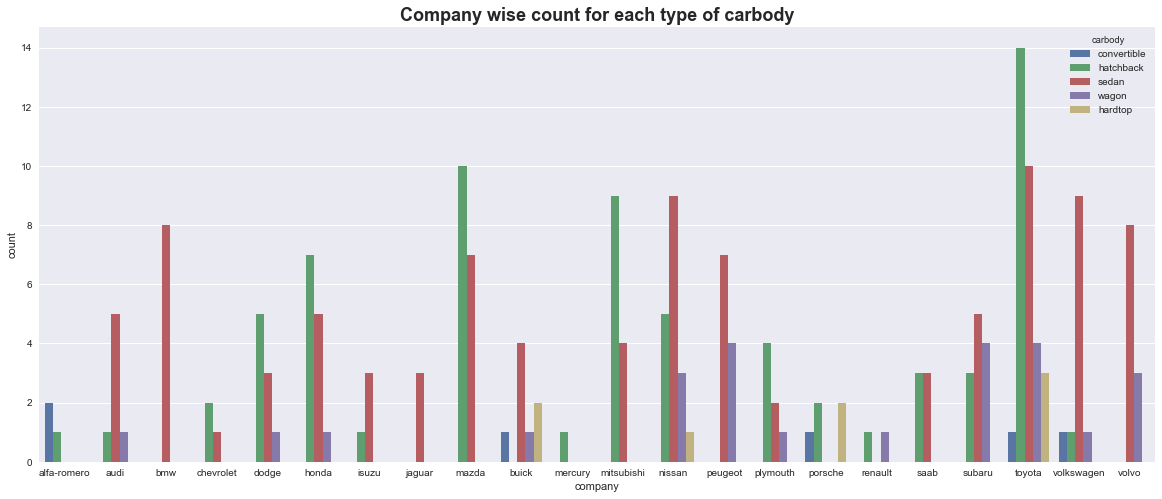

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(data = car, x = 'company',hue='carbody')
plt.title('Company wise count for each type of carbody',fontsize=18,weight="bold")
plt.show()

##### Company/Engine Size vs ['price','carwidth','horsepower','citympg', 'highwaympg']

In [21]:
crosstab = car.groupby(by=['company','enginesize'])['price','carwidth','horsepower','citympg', 'highwaympg'].mean().transpose()
crosstab

company    alfa-romero              audi                        bmw           \
enginesize         130      152      109      131      136      108      164   
price         14997.50 16500.00 13950.00 20867.08 17332.50 16677.50 22213.33   
carwidth         64.10    65.50    66.20    69.65    68.88    64.80    65.50   
horsepower      111.00   154.00   102.00   150.00   111.25   101.00   121.00   
citympg          21.00    19.00    24.00    16.50    18.75    23.00    20.67   
highwaympg       27.00    26.00    30.00    21.00    24.25    29.00    27.00   

company                buick                            chevrolet          \
enginesize      209      183      234      304      308       61      90    
price      36318.33 28394.00 34620.00 45400.00 40960.00   5151.00 6435.00   
carwidth      68.57    70.65    71.10    72.00    71.70     60.30   63.60   
horsepower   182.00   123.00   155.00   184.00   184.00     48.00   70.00   
citympg       15.67    22.00    16.00    14.00    14.00     47.00   38.00   
highwaympg    21.33    25.00    18.00    16.00    16.00     53.00   43.00   

company      dodge                            honda                   isuzu  \
enginesize     90      98      122      156     79      92      110     90    
price      6495.80 8257.50 8921.00 12964.00 5399.00 6930.33 9903.33 8916.50   
carwidth     63.80   63.80   64.60    66.30   64.00   63.95   64.88   63.60   
horsepower   68.00  102.00   88.00   145.00   60.00   73.00   90.83   70.00   
citympg      32.20   24.00   24.00    19.00   38.00   33.33   26.17   38.00   
highwaympg   38.60   30.00   30.00    24.00   42.00   38.00   31.83   43.00   

company                       jaguar             mazda                   \
enginesize     111      119      258      326      70       80      91    
price      6785.00 11048.00 33900.00 36000.00 12145.00 15645.00 6435.00   
carwidth     61.80    65.20    69.60    70.60    65.70    65.70   64.20   
horsepower   78.00    90.00   176.00   262.00   101.00   135.00   68.00   
citympg      24.00    24.00    15.00    13.00    17.00    16.00   30.80   
highwaympg   29.00    29.00    19.00    17.00    23.00    23.00   36.60   

company                                mercury mitsubishi                  \
enginesize      122      134      140      140        92      98      110   
price      10036.67 18344.00 18280.00 16503.00    6082.33 7689.00 9505.67   
carwidth      66.50    66.10    66.10    68.00      64.40   63.80   65.40   
horsepower    80.67    72.00   120.00   175.00      68.00  102.00  116.00   
citympg       27.67    31.00    19.00    19.00      33.00   24.00   23.00   
highwaympg    33.67    39.00    27.00    24.00      39.00   30.00   30.00   

company                      nissan                           peugeot  \
enginesize     122      156     97      103     120      181      120   
price      7892.33 13995.67 7243.44 7099.00 9249.00 16115.67 14649.00   
carwidth     65.40    66.30   63.80   63.80   65.20    67.20    68.40   
horsepower   88.00   145.00   69.00   55.00   97.00   162.67    96.20   
citympg      25.00    19.00   31.00   45.00   27.00    18.00    19.00   
highwaympg   32.00    24.00   37.00   50.00   34.00    23.67    24.00   

company                      plymouth                           porsche  \
enginesize      134      152      90      98      122      156      151   
price      18150.00 15797.00  6164.33 7783.00 8921.00 12764.00 22018.00   
carwidth      68.30    68.40    63.80   63.80   64.60    66.30    68.30   
horsepower   142.00    95.00    68.00   85.00   88.00   145.00   143.00   
citympg       18.00    26.80    33.00   27.50   24.00    19.00    19.00   
highwaympg    24.00    29.80    39.00   34.00   30.00    24.00    27.00   

company                      renault     saab  subaru          toyota          \
enginesize      194      203     132      121     97      108     92      98    
price      34528.00 31400.50 9595.00 15223.33 5118.00 8852.45 6961.33 8291.33  

<a id='cat'></a>

## VI. Convert Categorical Variables to Continuos

In [22]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
company           22
dtype: int64

In [23]:
# first convert categorical columns where there are only two distinct values to numeric(0 or 1)
car['fueltype'] = car['fueltype'].map({'gas':0, 'diesel':1})
car['aspiration'] = car['aspiration'].map({'std':0, 'turbo':1})
car['doornumber'] = car['doornumber'].map({'two':0, 'four':1})
car['enginelocation'] = car['enginelocation'].map({'front':0, 'rear':1})

In [24]:
def add_dummy(df,colname):
    """
    This function will convert the categorical column to continuos by adding dummy variables to the dataframe and 
    drop the original categorical column.
    df      :: dataframe
    colname :: name of categorical column
    """
    df_new = df.copy()
    dummy = pd.get_dummies(df_new[colname],drop_first=True)
    df_new = pd.concat([df_new,dummy],axis=1)
    df_new.drop(labels=colname,axis=1,inplace=True)
    print(colname,':::',dummy.columns.values,'\n')
    del dummy
    return df_new

In [25]:
car = add_dummy(car,'carbody')
car = add_dummy(car,'drivewheel')
car = add_dummy(car,'enginetype')
car = add_dummy(car,'fuelsystem')
car = add_dummy(car,'company')
car = add_dummy(car,'cylindernumber')

carbody ::: ['hardtop' 'hatchback' 'sedan' 'wagon'] 

drivewheel ::: ['fwd' 'rwd'] 

enginetype ::: ['dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor'] 

fuelsystem ::: ['2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi'] 

company ::: ['audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'renault'
 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 

cylindernumber ::: ['five' 'four' 'six' 'three' 'twelve' 'two'] 



<a id='scaling'></a>

## VII. Feature Scaling

In [26]:
car=(car-car.min())/(car.max()-car.min())

<a id='feature'></a>

## VIII. Feature Selection

In [27]:
# Putting feature variable to X(remove car_ID & price)
X = car.loc[:, ~car.columns.isin(['car_ID','price'])]

# Putting target variable to y
y = car['price']

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3)

In [29]:
regression = LinearRegression()

In [30]:
#rank all features
from sklearn.feature_selection import RFE
rfe = RFE(regression, n_features_to_select=1)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_train.columns)))
print(feature_ranking)

Features sorted by their rank::::

[(1, 'enginesize'), (2, 'carwidth'), (3, 'enginelocation'), (4, 'bmw'), (5, 'curbweight'), (6, 'horsepower'), (7, 'buick'), (8, 'highwaympg'), (9, 'two'), (10, 'peakrpm'), (11, 'porsche'), (12, 'dohcv'), (13, 'rotor'), (14, 'audi'), (15, 'carlength'), (16, 'saab'), (17, 'fueltype'), (18, 'idi'), (19, 'compressionratio'), (20, 'mitsubishi'), (21, 'five'), (22, 'ohcv'), (23, 'boreratio'), (24, 'wagon'), (25, 'hatchback'), (26, 'hardtop'), (27, 'sedan'), (28, 'symboling'), (29, '4bbl'), (30, 'mpfi'), (31, 'honda'), (32, 'wheelbase'), (33, 'plymouth'), (34, 'chevrolet'), (35, 'dodge'), (36, 'carheight'), (37, 'l'), (38, 'renault'), (39, 'toyota'), (40, 'jaguar'), (41, 'isuzu'), (42, 'nissan'), (43, 'mazda'), (44, 'subaru'), (45, 'volkswagen'), (46, 'ohcf'), (47, 'twelve'), (48, 'four'), (49, 'citympg'), (50, 'peugeot'), (51, 'ohc'), (52, 'aspiration'), (53, 'stroke'), (54, 'fwd'), (55, 'six'), (56, 'mfi'), (57, 'doornumber'), (58, 'spdi'), (59, 'rwd'), (6

In [31]:
# There are 64 features, we will select top 25 features from it and then mannualy do the backward elimination based on its
# p-value & VIF

In [32]:
top_features = [x[1] for x in feature_ranking[0:25]]
X_train = X_train[top_features]
vif_data = pd.concat([car[top_features],car['price']],axis=1)
X_test = X_test[top_features]
X_train.head()

,enginesize,carwidth,enginelocation,bmw,curbweight,horsepower,buick,highwaympg,two,peakrpm,porsche,dohcv,rotor,audi,carlength,saab,fueltype,idi,compressionratio,mitsubishi,five,ohcv,boreratio,wagon,hatchback
86,0.23,0.43,0.00,0.00,0.36,0.17,0.00,0.42,0.00,0.35,0.00,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.09,1.00,0.00,0.00,0.58,0.00,0.00
63,0.23,0.52,0.00,0.00,0.37,0.07,0.00,0.68,0.00,0.20,0.00,0.00,0.00,0.00,0.55,0.00,1.00,1.00,0.98,0.00,0.00,0.00,0.61,0.00,0.00
15,0.56,0.55,0.00,1.00,0.68,0.56,0.00,0.16,0.00,0.51,0.00,0.00,0.00,0.00,0.71,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.77,0.00,0.00
66,0.28,0.48,0.00,0.00,0.47,0.10,0.00,0.61,0.00,0.02,0.00,0.00,0.00,0.00,0.51,0.00,1.00,1.00,0.94,0.00,0.00,0.00,0.64,0.00,0.00
106,0.45,0.63,0.00,0.00,0.64,0.47,0.00,0.24,0.00,0.43,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.12,0.00,0.00,1.00,0.64,0.00,1.00


In [33]:
import statsmodels.api as sm          # Importing statsmodels
import statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
X_test = sm.add_constant(X_test)
# create a first fitted model

In [34]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [35]:
# Significance(p-value) is more important than multicollinearity(VIF value).
#So we will remove those features(one by one) which are having low significance(p-value > significant level).For multicollinearity
#we will check for VIF value(greater than 2.5-3) & parallely check for it's p-value , if it is greater than significant level we
#will remove that column and if p-value < significant level, we will keep that column.

In [129]:
def feature_to_drop(model,SF=0.05,vif_level =2):
    pvalue = model.pvalues[m1.pvalues >= SF]
    pvalue = pd.DataFrame(pvalue,columns=['pvalue'])
    vif = vif_cal(input_data=vif_data, dependent_col="price").set_index('Var')
    vif = vif[vif.Vif >= vif_level]
    matrix =pd.concat([pvalue,vif[vif.index.isin(final.index)]['Vif']],axis=1)
    matrix = matrix.sort_values(by='pvalue',ascending=False)
    feature_to_drop = matrix[0:1]
    return feature_to_drop

#### Iteration 1

In [36]:
#Let's see the summary of our first linear model
m1 = sm.OLS(y_train,X_train).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     128.4
Date:                Fri, 16 Mar 2018   Prob (F-statistic):           6.03e-73
Time:                        16:51:24   Log-Likelihood:                 246.53
No. Observations:                 143   AIC:                            -445.1
Df Residuals:                     119   BIC:                            -374.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1352      0.056     -2.418      0.017      -0.246      -0.024
enginesize           0.5323      0.083      6.394      0.000       0.367       0.697
carwidth             0.1824      0.066      2.769      0.007       0.052       0.313
enginelocation       0.1869      0.062      3.006      0.003       0.064       0.310
bmw                  0.1932      0.020      9.482      0.000       0.153       0.234
curbweight           0.3626      0.081      4.459      0.000       0.202       0.524
horsepower           0.1609      0.078      2.056      0.042       0.006       0.316
buick                0.2104      0.032      6.654      0.000       0.148       0.273
highwaympg           0.1063      0.065      1.634      0.105      -0.023       0.235
two                  0.0691      0.018      3.834      0.000       0.033       0.105
peakrpm              0.0728      0.030      2.400      0.018       0.013       0.133
porsche              0.1358      0.053      2.553      0.012       0.030       0.241
dohcv               -0.0999      0.077     -1.300      0.196      -0.252       0.052
rotor                0.0691      0.018      3.834      0.000       0.033       0.105
audi                 0.0833      0.032      2.577      0.011       0.019       0.147
carlength           -0.1312      0.068     -1.939      0.055      -0.265       0.003
saab                 0.0607      0.025      2.453      0.016       0.012       0.110
fueltype             0.1316      0.061      2.146      0.034       0.010       0.253
idi                  0.1316      0.061      2.146      0.034       0.010       0.253
compressionratio    -0.2968      0.145     -2.044      0.043      -0.584      -0.009
mitsubishi          -0.0728      0.020     -3.671      0.000      -0.112      -0.034
five                -0.0763      0.030     -2.542      0.012      -0.136      -0.017
ohcv                -0.0643      0.025     -2.578      0.011      -0.114      -0.015
boreratio           -0.0692      0.034     -2.025      0.045      -0.137      -0.002
wagon               -0.0359      0.016     -2.307      0.023      -0.067      -0.005
hatchback           -0.0294      0.011     -2.624      0.010      -0.052      -0.007
==============================================================================
Omnibus:                       24.307   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.642
Skew:                           0.744   Prob(JB):                     2.74e-11
Kurtosis:                       5.440   Cond. No.                     1.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-30. 

In [37]:
# Calculating Vif value
vif_cal(input_data=vif_data, dependent_col="price")

,Var,Vif
12,rotor,inf
8,two,inf
17,idi,inf
16,fueltype,inf
18,compressionratio,106.00
4,curbweight,89.33
14,carlength,84.12
1,carwidth,68.24
0,enginesize,43.18
5,horsepower,34.81


In [132]:
rows = list()

In [1529]:
model_summary = pd.DataFrame(columns=['Iteration#','No_Features','R-squared','Adj_R-squared','Column_to_Drop','p-value','VIF'])

In [ ]:
model_summary = model_summary.append([{'qty1':10.0}], ignore_index=True)

In [130]:
feature_to_drop = feature_to_drop(m1)
display(feature_to_drop)

,pvalue,Vif
dohcv,0.196,2.480


In [134]:
rows[0] = [[1,X_train.shape[0],m1.rsquared,m1.rsquared_adj]]

IndexError: list assignment index out of range

#### Iteration 2

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', axis =1)
vif_data = vif_data.drop('wheelbase', axis =1)

In [ ]:
m2 = sm.OLS(y_train,X_train).fit()
m2.summary()

In [ ]:
vif_cal(input_data=vif_data, dependent_col="price")

#### Iteration 3

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('peakrpm', axis =1)
vif_data = vif_data.drop('peakrpm', axis =1)

In [ ]:
m3 = sm.OLS(y_train,X_train).fit()
m3.summary()

In [ ]:
vif_cal(input_data=vif_data, dependent_col="price")

#### Iteration 4

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', axis =1)
vif_data = vif_data.drop('wheelbase', axis =1)

In [ ]:
m4 = sm.OLS(y_train,X_train).fit()
m4.summary()

In [ ]:
vif_cal(input_data=vif_data, dependent_col="price")

#### Iteration 5

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', axis =1)
vif_data = vif_data.drop('carheight', axis =1)

In [ ]:
m5 = sm.OLS(y_train,X_train).fit()
m5.summary()

In [ ]:
vif_cal(input_data=vif_data, dependent_col="price")

#### Iteration 6

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('doornumber', axis =1)
car_copy = car_copy.drop('doornumber', axis =1)

In [ ]:
m6 = sm.OLS(y_train,X_train).fit()
m6.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

#### Iteration 7

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', axis =1)
car_copy = car_copy.drop('carheight', axis =1)

In [ ]:
m7 = sm.OLS(y_train,X_train).fit()
m7.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

#### Iteration 8

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fwd', axis =1)
car_copy = car_copy.drop('fwd', axis =1)

In [ ]:
m8 = sm.OLS(y_train,X_train).fit()
m8.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

#### Iteration 9

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('horsepower', axis =1)
car_copy = car_copy.drop('horsepower', axis =1)

In [ ]:
m9 = sm.OLS(y_train,X_train).fit()
m9.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

#### Iteration 10

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('aspiration', axis =1)
car_copy = car_copy.drop('aspiration', axis =1)

In [ ]:
m10 = sm.OLS(y_train,X_train).fit()
m10.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

#### Iteration 11

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohcv', axis =1)
car_copy = car_copy.drop('ohcv', axis =1)

In [ ]:
m11 = sm.OLS(y_train,X_train).fit()
m11.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

#### Iteration 12

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('2bbl', axis =1)
car_copy = car_copy.drop('2bbl', axis =1)

In [ ]:
m12 = sm.OLS(y_train,X_train).fit()
m12.summary()

In [ ]:
vif_cal(input_data=car_copy, dependent_col="price")

In [ ]:
# Making predictions
X_test = X_test[X_train.columns]
y_pred = m1.predict(X_test)

In [ ]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print(mse)
r_square = r2_score(y_test,y_pred)
print(r_square)

In [ ]:
#Backward Elimination with p-values only:

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 


In [ ]:
#Backward Elimination with p-values and Adjusted R Squared:

import statsmodels.formula.api as sm
def backwardElimination(X_train, SL,y_train):
    numVars = len(X_train)
    temp = np.zeros((X_train.shape)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y_train,X_train).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = X_train[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y_train,X_train).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((X_train, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

In [ ]:
SL = 0.05
len(X_train)
X_Modeled = backwardElimination(X_train, SL,y_train)